In [1]:
import os
import sys
project_path = '../'
sys.path.append(project_path)

In [2]:
from elasticsearch import Elasticsearch

In [3]:
from src.pipeline.text_preprocessing import run_preprocessing_steps

#### Get some bills from es

In [4]:
es = Elasticsearch([{'host':'localhost','port':9200}])

In [17]:
phrase = 'unborn child rights'
search_query = {'query': {'match': {'doc': phrase}}}
res = es.search(index="bill_text", body=search_query, size=100)
hits = res['hits']['hits']

In [18]:
num_hits = len(hits)
docs = []

for i in range(num_hits):
    doc = hits[i]['_source']['doc']
    docs.append(doc)

In [7]:
doc = docs[0]

##### html tags and urls 

In [25]:
doc = strip_html_tags(doc)
doc = strip_urls(doc)
doc

'Senate\nFile\n287\n-\nIntroduced\nSENATE\nFILE\n287\nBY\nSORENSON\nA\nBILL\nFOR\nAn\nAct\nrelating\nto\nthe\ndetermination\nof\nwhen\nlife\nbegins\nand\n1\nacknowledging\nthe\nrights,\nprivileges,\nand\nimmunities\nof\nan\n2\nunborn\nchild.\n3\nBE\nIT\nENACTED\nBY\nTHE\nGENERAL\nASSEMBLY\nOF\nTHE\nSTATE\nOF\nIOWA:\n4\nTLSB\n2589XS\n(1)\n84\npf/nh\nS.F.\n287\nSection\n1.\nNEW\nSECTION\n.\n598C.1\nUnborn\nchild\n——\nfindings\n——\n1\nrights,\nprivileges,\nand\nimmunities\n——\nno\ncause\nof\naction.\n2\n1.\nThe\ngeneral\nassembly\nof\nthis\nstate\nfinds\nall\nof\nthe\n3\nfollowing:\n4\na.\nThe\nlife\nof\neach\nhuman\nbeing\nbegins\nat\nconception.\n5\nb.\nAn\nunborn\nchild\nhas\nprotectable\ninterests\nin\nlife,\n6\nhealth,\nand\nwell-being.\n7\nc.\nThe\nbiological\nparent\nof\nan\nunborn\nchild\nhas\nprotectable\n8\ninterests\nin\nthe\nlife,\nhealth,\nand\nwell-being\nof\nthe\nunborn\n9\nchild.\n10\n2.\nThe\nlaws\nof\nthis\nstate\nshall\nbe\ninterpreted\nand\nconstrued\n11\nto\nacknowled

##### remove numbers and punctuation

In [26]:
doc = remove_numbers(doc)
doc = remove_punctuation(doc)
doc

'Senate File  Introduced SENATE FILE BY SORENSON A BILL FOR An Act relating to the determination of when life begins and acknowledging the rights  privileges  and immunities of an unborn child  BE IT ENACTED BY THE GENERAL ASSEMBLY OF THE STATE OF IOWA  TLSB 2589XS   pfnh SF  Section  NEW SECTION  598C1 Unborn child —— findings —— rights  privileges  and immunities —— no cause of action   The general assembly of this state finds all of the following  a  The life of each human being begins at conception  b  An unborn child has protectable interests in life  health  and wellbeing  c The biological parent of an unborn child has protectable interests in the life  health  and wellbeing of the unborn child   The laws of this state shall be interpreted and construed to acknowledge on behalf of an unborn child at every stage of development  all the rights  privileges  and immunities available to other persons  citizens  and residents of this state   As used in this section  “ unborn child ” me

##### Stemming

In [23]:
doc = stem_words(doc)
doc

'sen fil introduc sen fil by sorenson a bil for an act rel to the determin of when lif begin and acknowledg the right privileg and immun of an unborn child be it enact by the gen assembl of the stat of iow tlsb 2589xs pfnh sf sect new sect 598c1 unborn child —— find —— right privileg and immun —— no caus of act the gen assembl of thi stat find al of the follow a the lif of each hum being begin at conceiv b an unborn child has protect interest in lif heal and wellb c the biolog par of an unborn child has protect interest in the lif heal and wellb of the unborn child the law of thi stat shal be interpret and constru to acknowledg on behalf of an unborn child at every stag of develop al the right privileg and immun avail to oth person cit and resid of thi stat as us in thi sect “ unborn child ” mean the offspr of a hum being from the mom of conceiv until bir at every stag of biolog develop noth in thi sect shal be interpret to cre a caus of act against a wom for indirect harm the wom ’ s 

##### Lemmatization

In [12]:
doc = lemmatize_words(doc)
doc

[nltk_data] Downloading package wordnet to /home/kasun/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'sen fil introduc sen fil by sorenson a bil for an act rel to the determin of when lif begin and acknowledg the right privileg and immun of an unborn child be it enact by the gen assembl of the stat of iow tlsb 2589xs pfnh sf sect new sect 598c1 unborn child —— find —— right privileg and immun —— no cau of act the gen assembl of thi stat find al of the follow a the lif of each hum being begin at conceiv b an unborn child ha protect interest in lif heal and wellb c the biolog par of an unborn child ha protect interest in the lif heal and wellb of the unborn child the law of thi stat shal be interpret and constru to acknowledg on behalf of an unborn child at every stag of develop al the right privileg and immun avail to oth person cit and resid of thi stat a u in thi sect “ unborn child ” mean the offspr of a hum being from the mom of conceiv until bir at every stag of biolog develop noth in thi sect shal be interpret to cre a cau of act against a wom for indirect harm the wom ’ s unborn

##### Test the preprocessing wrapper

#### Wordcloud

In [19]:
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

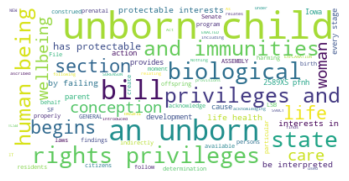

In [28]:
# tokens = word_tokenize(doc)

wordcloud = WordCloud(background_color="white").generate(doc)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Preprocessing wrapper

In [26]:
steps = ['remove_numbers', 'remove_punctuation', 'remove_stop_words']

In [27]:
preproc_docs = run_preprocessing_steps(docs, steps)

In [28]:
all_doc_tokens = ' '.join(preproc_docs)

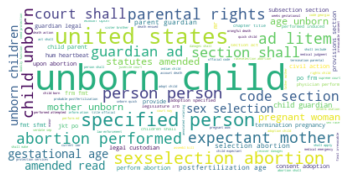

In [29]:
wordcloud = WordCloud(background_color="white").generate(all_doc_tokens)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()